In [1]:
#Import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setting the variables for my initial data
mean = .5
std = mean/6
datapoints = 20000

In [3]:
#Function to get a list with a gaussian distribution
def get_gaussian_dist(mean,std,datapoints):
    gauss_lst = []
    while len(gauss_lst) < datapoints:
        sample = random.gauss(mean, std)
        if sample >= 0 and sample <= 1:
            gauss_lst.append(sample)
    return gauss_lst    

#Function to calculate the multiplier for water based on 3 regions
def get_waterfall(datapoints):
    pop = [-.02,0,.02]
    wei = [3,3,3]    
    lst = []
    for points in range(datapoints):
        multi = random.choices(pop,wei,k=1)
        lst.append(multi[0])
    return(lst)

In [26]:
def make_dataframe(mean,std,datapoints,plant,base,multi):
    gauss_1 = get_gaussian_dist(mean,std,datapoints)
    gauss_2 = get_gaussian_dist(mean,std,datapoints)
    gauss_3 = get_gaussian_dist(mean,std,datapoints)
    gauss_4 = get_gaussian_dist(mean,std,datapoints)
    water = get_waterfall(datapoints)
    dict = {'Base_gauss':gauss_1,'Sun_gauss':gauss_2,'Water_multi':water}
    df=pd.DataFrame(dict)
    df['var_1'] = (((df['Base_gauss'] * multi) + base) + df['Sun_gauss']) * (df['Water_multi'] + 1)
    df['plant_type'] = plant
    return(df)

In [6]:
plant_1 = make_dataframe(mean,std,datapoints,'plant_1',9.9,1)
plant_2 = make_dataframe(mean,std,datapoints,'plant_2',10.1,1)
plant_3 = make_dataframe(mean,std,datapoints,'plant_3',9.8,1.4)

In [30]:
fake_iris = pd.concat([plant_1,plant_2,plant_3])

In [31]:
fake_iris.sample(10)

,Base_gauss,Sun_gauss,Water_multi,var_1,plant_type
2171,0.535000,0.543223,0.00,11.178223,plant_2
11594,0.585768,0.410445,0.02,11.114137,plant_1
12682,0.551604,0.471927,0.02,11.265056,plant_3
14377,0.441383,0.567898,0.02,11.205551,plant_3
17288,0.377806,0.371289,0.02,10.914222,plant_3
9941,0.485763,0.532190,-0.02,10.895594,plant_2
11894,0.497817,0.478607,-0.02,10.854895,plant_2
18933,0.478459,0.580557,-0.02,10.739836,plant_1
8107,0.531252,0.527148,0.02,11.381568,plant_2
4483,0.504832,0.367885,0.02,11.092144,plant_3


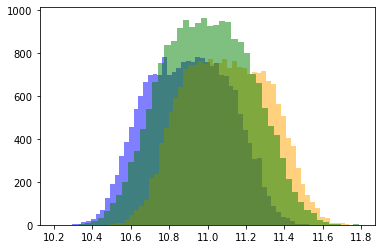

In [28]:
plt.hist(plant_1['var_1'], bins = 50, color='blue',alpha=.5);
plt.hist(plant_2['var_1'], bins = 50, color='orange',alpha=.5);
plt.hist(plant_3['var_1'], bins = 50, color='green',alpha=.5);

In [19]:
plant_3.sample(5)

,Base_gauss,Sun_gauss,Water_multi,var_1,plant_type
322,0.493576,0.488536,0.00,14.899542,plant_1
5698,0.341562,0.527258,0.00,14.725446,plant_1
17662,0.448877,0.521753,0.02,15.167584,plant_1
14877,0.604977,0.318673,-0.02,14.587928,plant_1
11919,0.590805,0.575342,-0.02,14.820020,plant_1


In [30]:
gauss_1 = get_gaussian_dist(mean,std,datapoints)
gauss_2 = get_gaussian_dist(mean,std,datapoints)
water = get_waterfall(datapoints)

dict = {'Base_Gauss':gauss_1,'Sun_gauss':gauss_2,'Water_multi':water}
fake_iris=pd.DataFrame(dict)

In [ ]:
fake_iris.sample(5)

In [31]:
fake_iris['water_1_base'] = fake_iris['Water_multi'] + 1
fake_iris['water_2_base'] = fake_iris['Water_multi'] + 1
fake_iris['water_3_base'] = fake_iris['Water_multi'] + 1

In [32]:
fake_iris['plant_1_base'] = fake_iris['Base_Gauss'] + 9.9
fake_iris['plant_2_base'] = fake_iris['Base_Gauss'] + 10.1
fake_iris['plant_3_base'] = (fake_iris['Base_Gauss'] * 1.4) + 9.8

In [33]:
fake_iris['var_1'] = (fake_iris['plant_1_base'] + fake_iris['Sun_gauss']) * fake_iris['water_1_base']
fake_iris['var_2'] = (fake_iris['plant_2_base'] + fake_iris['Sun_gauss']) * fake_iris['water_2_base']
fake_iris['var_3'] = (fake_iris['plant_3_base'] + fake_iris['Sun_gauss']) * fake_iris['water_3_base']

In [ ]:
fake_iris.sample(5)

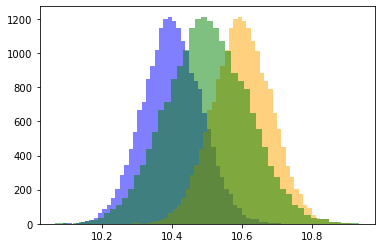

In [34]:
plt.hist(fake_iris['plant_1_base'], bins = 50, color='blue',alpha=.5);
plt.hist(fake_iris['plant_2_base'], bins = 50, color='orange',alpha=.5);
plt.hist(fake_iris['plant_3_base'], bins = 50, color='green',alpha=.5);

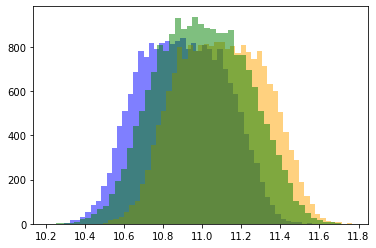

In [36]:
plt.hist(fake_iris['var_1'], bins = 50, color='blue',alpha=.5);
plt.hist(fake_iris['var_2'], bins = 50, color='orange',alpha=.5);
plt.hist(fake_iris['var_3'], bins = 50, color='green',alpha=.5);